# Pymaceuticals Inc.
---

### Analysis
The mouse study dataset provides us with a comprehensive statistical overview of how the tumor growth progression looks within mice whilst being under the treatment of various specified drug regimens. As seen in the summary statistics, the data collected spans a total of 1,893 observations which were collected across multiple timepoints, with a focus on key metrics like tumor volume, metastatic sites, and mouse demographics (sex, weight, and age). Overall, the analysis data reveals a significant difference in the effectiveness of a number of these treatments, with notable patterns emerging from the data.

Among the regimens, Capomulin and Ramicane clearly stand out as the most effective in reducing or preventing tumor growth. These two treatments consistently show some of the lowest tumor volumes, with average tumor volumes around 40mm³ and final tumor volumes averaging about 48mm³. In comparison, drugs like Infubinol and Ceftamin—while still considered among the better options—have higher average tumor volumes of around 52mm³ and final volumes closer to 70mm³. Additionally, Capomulin and Ramicane demonstrate much more consistent results, with median tumor volumes of 38.13mm³ and 36.56mm³, respectively, along with significantly lower variance and standard deviation compared to other treatments. In contrast, Infubinol and Ceftamin exhibit larger spreads in their tumor data, higher variability, and even some significant outliers, particularly for Infubinol. This consistency makes Capomulin and Ramicane more reliable choices when considering to manage or reduce tumor growth.

The data, with its nearly even gender split, provides a solid basis for a balanced comparison and unbiased insights across all regimens, forming a reliable foundation for analysis. That being said, upon further exploration of the specific tendencies of the drug regimens reveals potential factors that may lead to skew the data slightly. For instance, within the Capomulin regimen, a positive correlation was observed and charted between mouse weight and tumor size, which indicated that larger mice tend to have slightly larger tumors even when under effective treatment regiments. This relationship could easily influence the average and compiled results, depending on the average size of the mice studied. In order to mitigate this, it may be beneficial to rather analyze the rate of change in tumor volumes over time, thus reducing the impact which size has on the actual figures. Alternatively, introducing a control to normalize tumor calculations or mouse selection based on size could improve the accuracy and consistency of the findings.

In conclusion, the mouse study dataset highlights Capomulin and Ramicane as the most effective treatments, showing consistently low tumor volumes with minimal variability. Also while the balanced gender split provides a strong basis for a potential of unbiased comparisons, the correlation between mouse weight and tumor volumes does suggest some potential of skewing in the data which must be addressed. Exploring tumor volume changes over time or normalizing for mouse size could help improve the accuracy of future analyses and provide a better outlook on which Drug regiment is performing or progressing the best.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

mouse_study_complete_df = study_results.merge(mouse_metadata, on = 'Mouse ID', how = 'outer')

# Display the data table for preview

mouse_study_complete_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [2]:
# Checking the number of mice.

mouse_study_complete_df['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicates = mouse_study_complete_df[mouse_study_complete_df.duplicated(subset=['Mouse ID', 'Timepoint'])]

# List all Unique Duplicates

duplicates['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.

mouse_g989_data = mouse_study_complete_df[mouse_study_complete_df['Mouse ID'] == 'g989']

mouse_g989_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
586,g989,0,45.000000,0,Propriva,Female,21,26
587,g989,0,45.000000,0,Propriva,Female,21,26
588,g989,5,48.786801,0,Propriva,Female,21,26
589,g989,5,47.570392,0,Propriva,Female,21,26
590,g989,10,51.745156,0,Propriva,Female,21,26
591,g989,10,49.880528,0,Propriva,Female,21,26
592,g989,15,51.325852,1,Propriva,Female,21,26
593,g989,15,53.442020,0,Propriva,Female,21,26
594,g989,20,55.326122,1,Propriva,Female,21,26
595,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_study_cleaned_df = mouse_study_complete_df.drop(mouse_g989_data.index)

mouse_study_cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [6]:
# Checking the number of mice in the clean DataFrame.

mouse_study_cleaned_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

mean_tumor_volume = mouse_study_cleaned_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median_tumor_volume = mouse_study_cleaned_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
tumor_volume_variance = mouse_study_cleaned_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
tumor_volume_std = mouse_study_cleaned_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
tumor_volume_sem = mouse_study_cleaned_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.

drug_regimen_tumor_summary_df = pd.concat([mean_tumor_volume, median_tumor_volume, tumor_volume_variance,
											tumor_volume_std, tumor_volume_sem], axis = 1, 
											keys = ['Mean Tumor Volume', 'Median Tumor Volume',
											'Tumor Volume Variance', 'Tumor Volume Std. Dev.',
											'Tumor Volume Std. Err.'])

drug_regimen_tumor_summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

drug_regimen_tumor_summary_df_agg = mouse_study_cleaned_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)' : 
																						['mean', 'median', 'var', 
						 																'std', 'sem']})

drug_regimen_tumor_summary_df_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

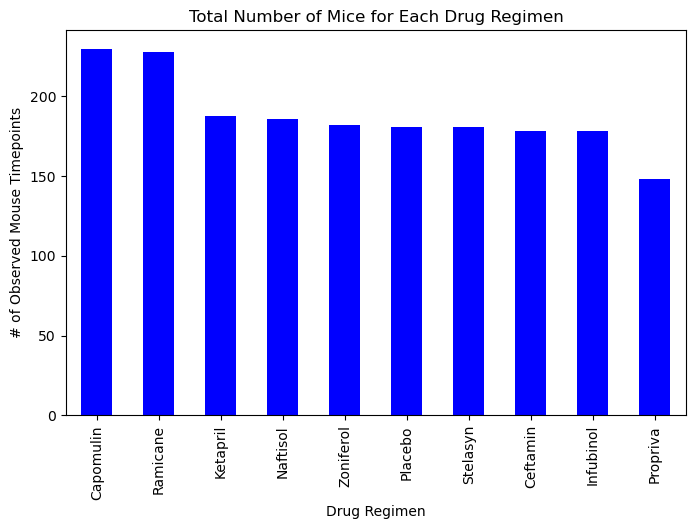

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

total_number_mouse = mouse_study_cleaned_df.groupby(['Drug Regimen']).count().sort_values(by = 'Mouse ID', ascending = False)
total_number_mouse.plot(kind='bar', figsize=(8, 5), color='b', legend= False,)

# Chart Formatting 

plt.title('Total Number of Mice for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlim(-0.5, len(total_number_mouse)-0.5)
plt.xticks(rotation=90)
plt.show()

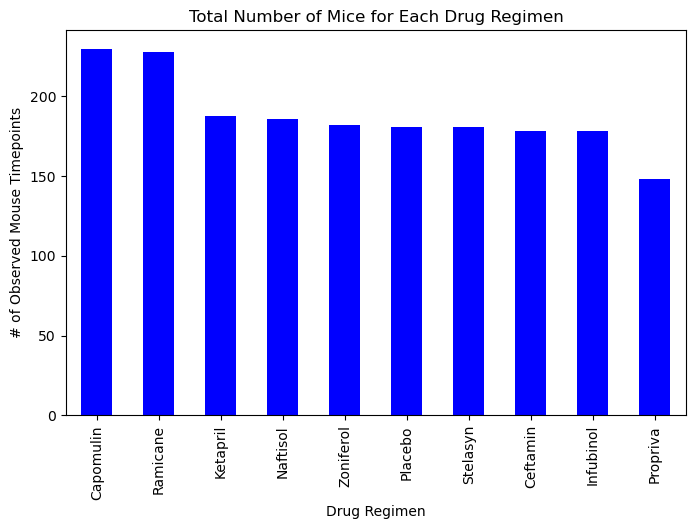

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.figure(figsize=(8, 5))
plt.bar(total_number_mouse.index, total_number_mouse['Mouse ID'], color='b', width = 0.5)

# Chart Formatting 

plt.title('Total Number of Mice for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlim(-0.5, len(total_number_mouse)-0.5)
plt.xticks(rotation=90)
plt.show()

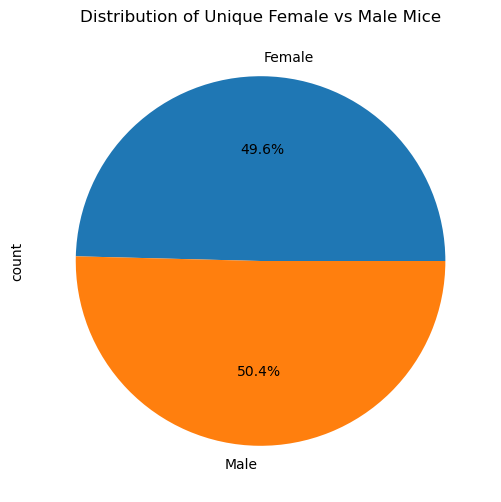

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender

gender_counts = mouse_study_cleaned_df.groupby('Sex')['Mouse ID'].nunique()

# Make the pie chart

plt.figure(figsize=(10, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%')

# Pie chart formatting

plt.title('Distribution of Unique Female vs Male Mice')
plt.ylabel('count')
plt.show()

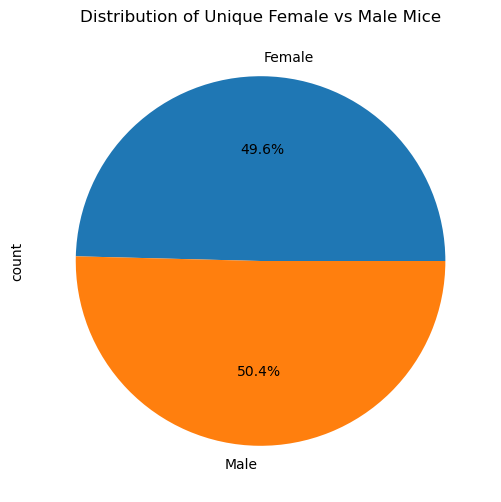

In [12]:
# Generate a pie chart, using Pyplot, showing the distribution of unique female versus male mice used in the study

# Make the pie chart

plt.figure(figsize=(10, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')

# Pie chart formatting

plt.title('Distribution of Unique Female vs Male Mice')
plt.ylabel('count')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

regimen_selection = mouse_study_cleaned_df.loc[(mouse_study_cleaned_df['Drug Regimen'] == 'Capomulin') |
											   (mouse_study_cleaned_df['Drug Regimen'] == 'Ramicane') |
											   (mouse_study_cleaned_df['Drug Regimen'] == 'Infubinol') |
											   (mouse_study_cleaned_df['Drug Regimen'] == 'Ceftamin')]

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = regimen_selection.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

mouse_study_last_time_df = last_timepoint.merge(mouse_study_cleaned_df, on = ['Mouse ID', 'Timepoint'], how = 'left') 

# Calculate and print the avg Final Tumor Volume per Drug Regimen

average_final_tumor_vol_byDrug = mouse_study_cleaned_df.groupby('Drug Regimen').max().sort_values('Tumor Volume (mm3)')

average_final_tumor_vol_byDrug

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Ramicane,z578,45,47.622816,3,Male,23,25
Capomulin,y793,45,48.158209,3,Male,24,25
Ceftamin,y865,45,68.923185,4,Male,24,30
Infubinol,z581,45,72.226731,4,Male,24,30
Propriva,z435,45,72.455421,4,Male,24,30
Placebo,y478,45,73.212939,4,Male,21,30
Zoniferol,x613,45,73.324432,4,Male,24,30
Stelasyn,z314,45,75.123690,4,Male,23,30
Naftisol,z969,45,76.668817,4,Male,23,30


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

for i in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    treatment_tumor_vol = mouse_study_last_time_df.loc[mouse_study_last_time_df['Drug Regimen'] == i, 'Tumor Volume (mm3)' ]

    # add subset

    tumor_vol_data.append(treatment_tumor_vol)

    # Determine outliers using upper and lower bounds

    quantiles = treatment_tumor_vol.quantile([.25,.75])
    Q1 = quantiles[0.25]
    Q3 = quantiles[0.75]
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = treatment_tumor_vol[(treatment_tumor_vol < lower_bound) | (treatment_tumor_vol > upper_bound)]
    
    print (f"{i}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Final Tumor Volume (mm³)')

<Figure size 1000x600 with 0 Axes>

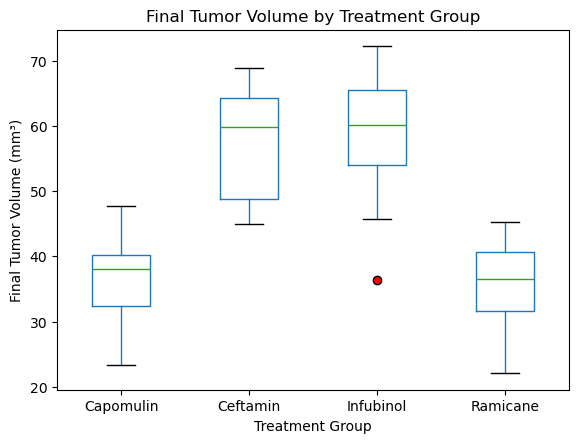

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

plt.figure(figsize=(10, 6))
mouse_study_last_time_df.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', grid=False, flierprops=dict(markerfacecolor='red', marker='o'))

# Chart Formatting

plt.title('Final Tumor Volume by Treatment Group')
plt.suptitle('')
plt.xlabel('Treatment Group')
plt.ylabel('Final Tumor Volume (mm³)')

## Line and Scatter Plots

<Figure size 1000x600 with 0 Axes>

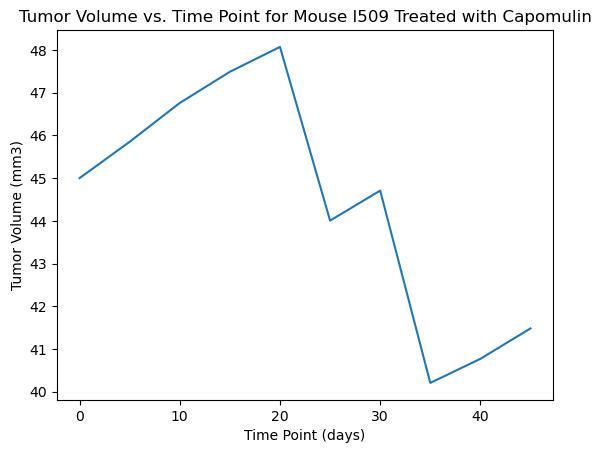

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Select and Filter Mouse

selected_mouse_id = 'l509'
a_mouse_df = mouse_study_cleaned_df[mouse_study_cleaned_df['Mouse ID'] == selected_mouse_id]

# Create a Line Chart

plt.figure(figsize=(10, 6))
a_mouse_df.plot.line(x = 'Timepoint', y = 'Tumor Volume (mm3)')

# Chart Formatting

plt.title(f'Tumor Volume vs. Time Point for Mouse {selected_mouse_id} Treated with Capomulin')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend().set_visible(False)

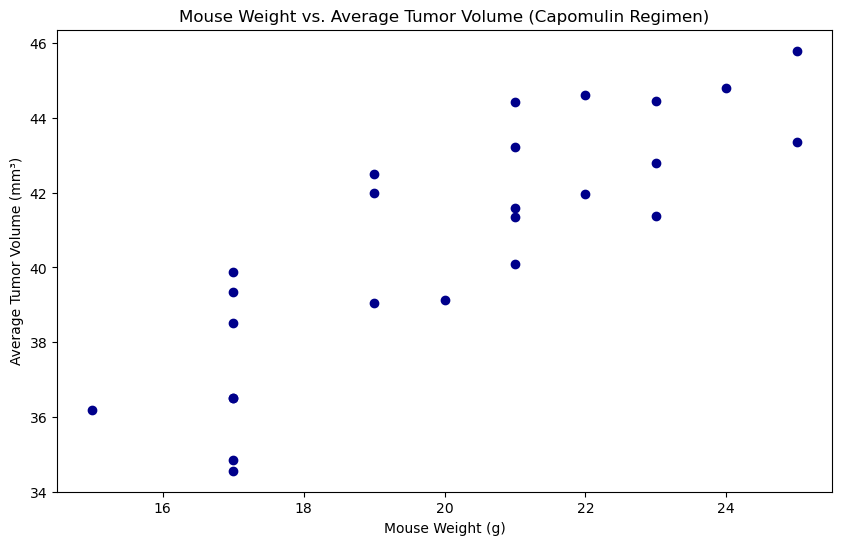

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Select and Filter Drug Regimen

capomulin_df = mouse_study_cleaned_df[mouse_study_cleaned_df['Drug Regimen'] == 'Capomulin']



# Calculate Average Tumor Volume by Weight

avg_tumor_vol = capomulin_df.groupby(['Mouse ID', 'Weight (g)'])['Tumor Volume (mm3)'].mean().reset_index()

# Create a Scatter Chart

plt.figure(figsize=(10, 6))
plt.scatter(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'], color='darkblue')

# Chart Formatting

plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm³)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


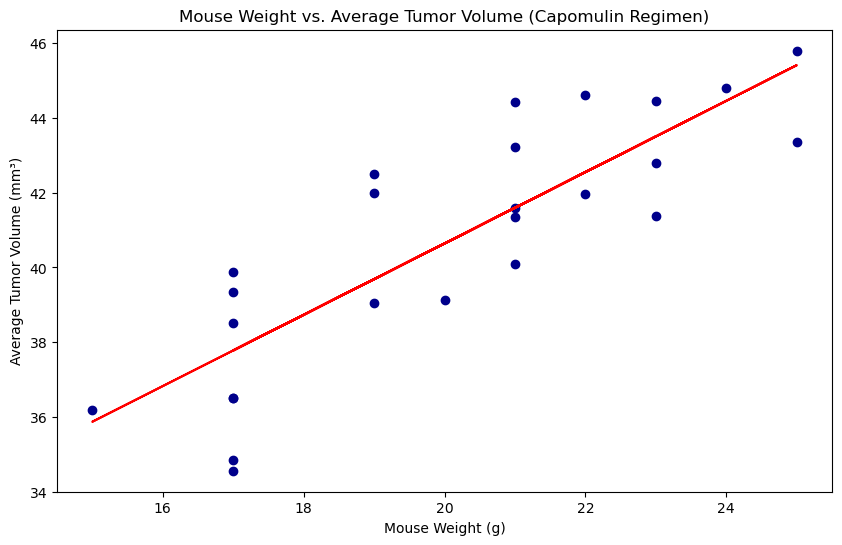

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Create a Scatter Chart

plt.figure(figsize=(10, 6))
plt.scatter(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'], color='darkblue')

# Calculate and Print Correlation

correlation = avg_tumor_vol['Weight (g)'].corr(avg_tumor_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation,2)}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])

# Create and plot a linear regression line
regression_line = slope * avg_tumor_vol['Weight (g)'] + intercept

plt.plot(avg_tumor_vol['Weight (g)'], regression_line, color = 'r')

# Chart Formatting

plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm³)')
plt.show()